In [172]:
import pandas as pd
#Because dataset is big (29 columns) we need to show every columns using pd
pd.set_option('max_columns', None)
import seaborn as sns
import numpy as np



import plotly.offline as py;
from plotly import tools;
import plotly.graph_objs as go;

import warnings;
from ipywidgets import interact;
warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
file_url = r"C:\Users\Lenovo\Documents\INDE DATA\expenditure.csv"

data= pd.read_csv(file_url, on_bad_lines='skip', sep=";")
#We make a copy of the file and work on it
data = data.copy()
data.head()


,HHID,CentreCodeRnd,Vill_Blk_Slno,Round,Schedule,Sample,Sector,State_Region,State,State_District,Stratum,SubStratumNo,SubRound,SubSample,FODSubRegion,HG_SubBlkNo,Second_Stratum,Hhold_no,Level,b56789q2,b56789q3,NSS,NSC,MLT,Weight_SS,Weight_SC
0,744471301,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,1,4,bus fare,2000,2,4,65649,"656,49","328,245"
1,744471301,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,1,4,overnight journey related transport: sub-total...,2000,2,4,65649,"656,49","328,245"
2,744471301,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,1,4,bus fare for commuting to work: periodic (lump...,300,2,4,65649,"656,49","328,245"
3,744471301,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,1,4,other transport: sub-total (510-524),300,2,4,65649,"656,49","328,245"
4,744471301,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,1,4,barber,100,2,4,65649,"656,49","328,245"


In [173]:
data.shape
data.columns

Index(['HHID', 'CentreCodeRnd', 'Vill_Blk_Slno', 'Round', 'Schedule', 'Sample',
       'Sector', 'State_Region', 'State', 'State_District', 'Stratum',
       'SubStratumNo', 'SubRound', 'SubSample', 'FODSubRegion', 'HG_SubBlkNo',
       'Second_Stratum', 'Hhold_no', 'Level', 'b56789q2', 'b56789q3', 'NSS',
       'NSC', 'MLT', 'Weight_SS', 'Weight_SC'],
      dtype='object')

In [174]:
#I need to label all collum _ I check in excel file, the label column
df= pd.read_excel(r"C:\Users\Lenovo\Documents\INDE DATA\variables list of expenditude csv.xlsx")
df


,#,Name,Label,Type,Format,Valid,Invalid,Question
0,1,HHID,‘Primary key - unique identifier for a household’,Discrete,character 9,1522649,0,NaN
1,2,CentreCodeRnd,"Centre code,Round",Discrete,character 3,1522649,0,NaN
2,3,Vill_Blk_Slno,FSU Serial No.,Discrete,character 5,1522649,0,NaN
3,4,Round,Round,Discrete,character 2,1522649,0,NaN
4,5,Schedule,Schedule,Discrete,character 3,1522649,0,NaN
5,6,Sample,Sample,Discrete,character 1,1522649,0,NaN
6,7,Sector,Sector,Discrete,character 1,1522649,0,NaN
7,8,State_Region,‘State-Region’,Discrete,character 3,1522649,0,NaN
8,9,State,State,Discrete,character 2,1522649,0,NaN
9,10,State_District,‘State-District’,Discrete,character 4,1522649,0,NaN


In [175]:
data.columns = df['Label'].tolist()
data.columns

Index(['‘Primary key - unique identifier for a household’',
       'Centre code,Round', 'FSU Serial No.', 'Round', 'Schedule', 'Sample',
       'Sector', '‘State-Region’', 'State', '‘State-District’', 'Stratum',
       'Sub-Stratum-no', 'Sub-Round', 'Sub-Sample', 'FOD-Sub-Region',
       'Hamlet group/Sub-block no.', 'Second-Stage-Stratum-no',
       'Sample hhld. No.', '‘Level 4-block 5,6,7,8,9’', 'Item Code',
       'Expenditure (Rs.)',
       'number of first stage units surveyed within a substratum for the sub-sample',
       'number of first stage units surveyed within a substratum for sub-sample combined',
       'weight or multiplier within a substratum for the sub-sample',
       'Final weight for sub-sample wise estimates',
       'Final weight for sub-sample combined estimates'],
      dtype='object')

In [93]:
data.head()

,‘Primary key - unique identifier for a household’,"Centre code,Round",FSU Serial No.,Round,Schedule,Sample,Sector,‘State-Region’,State,‘State-District’,Stratum,Sub-Stratum-no,Sub-Round,Sub-Sample,FOD-Sub-Region,Hamlet group/Sub-block no.,Second-Stage-Stratum-no,Sample hhld. No.,"‘Level 4-block 5,6,7,8,9’",Item Code,Expenditure (Rs.),number of first stage units surveyed within a substratum for the sub-sample,number of first stage units surveyed within a substratum for sub-sample combined,weight or multiplier within a substratum for the sub-sample,Final weight for sub-sample wise estimates,Final weight for sub-sample combined estimates
0,744471301,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,1,4,bus fare,2000,2,4,65649,"656,49","328,245"
1,744471301,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,1,4,overnight journey related transport: sub-total...,2000,2,4,65649,"656,49","328,245"
2,744471301,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,1,4,bus fare for commuting to work: periodic (lump...,300,2,4,65649,"656,49","328,245"
3,744471301,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,1,4,other transport: sub-total (510-524),300,2,4,65649,"656,49","328,245"
4,744471301,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,1,4,barber,100,2,4,65649,"656,49","328,245"


In [94]:
#delete ' ' in coluùns labels
data.columns=data.columns.str.replace(r"[\‘\’]", '', regex=True)
data

,Primary key - unique identifier for a household,"Centre code,Round",FSU Serial No.,Round,Schedule,Sample,Sector,State-Region,State,State-District,Stratum,Sub-Stratum-no,Sub-Round,Sub-Sample,FOD-Sub-Region,Hamlet group/Sub-block no.,Second-Stage-Stratum-no,Sample hhld. No.,"Level 4-block 5,6,7,8,9",Item Code,Expenditure (Rs.),number of first stage units surveyed within a substratum for the sub-sample,number of first stage units surveyed within a substratum for sub-sample combined,weight or multiplier within a substratum for the sub-sample,Final weight for sub-sample wise estimates,Final weight for sub-sample combined estimates
0,744471301,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,1,4,bus fare,2000,2,4,65649,"656,49","328,245"
1,744471301,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,1,4,overnight journey related transport: sub-total...,2000,2,4,65649,"656,49","328,245"
2,744471301,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,1,4,bus fare for commuting to work: periodic (lump...,300,2,4,65649,"656,49","328,245"
3,744471301,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,1,4,other transport: sub-total (510-524),300,2,4,65649,"656,49","328,245"
4,744471301,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,1,4,barber,100,2,4,65649,"656,49","328,245"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522644,924591302,72F,92459,72,15,Central,Urban,351,A & N ISLANDS,South Andaman,3,9,4,2,3510.0,1,3,2,4,repair & maintenance: motorized vehicles (incl...,3500,2,4,101638,"1016,38","508,19"
1522645,924591302,72F,92459,72,15,Central,Urban,351,A & N ISLANDS,South Andaman,3,9,4,2,3510.0,1,3,2,4,sub-total(680-687),53500,2,4,101638,"1016,38","508,19"
1522646,924591302,72F,92459,72,15,Central,Urban,351,A & N ISLANDS,South Andaman,3,9,4,2,3510.0,1,3,2,4,from tea/coffee shops,20,2,4,101638,"1016,38","508,19"
1522647,924591302,72F,92459,72,15,Central,Urban,351,A & N ISLANDS,South Andaman,3,9,4,2,3510.0,1,3,2,4,from preparers of parathas/puris/samosas/patti...,200,2,4,101638,"1016,38","508,19"


In [95]:
data.columns

Index(['Primary key - unique identifier for a household', 'Centre code,Round',
       'FSU Serial No.', 'Round', 'Schedule', 'Sample', 'Sector',
       'State-Region', 'State', 'State-District', 'Stratum', 'Sub-Stratum-no',
       'Sub-Round', 'Sub-Sample', 'FOD-Sub-Region',
       'Hamlet group/Sub-block no.', 'Second-Stage-Stratum-no',
       'Sample hhld. No.', 'Level 4-block 5,6,7,8,9', 'Item Code',
       'Expenditure (Rs.)',
       'number of first stage units surveyed within a substratum for the sub-sample',
       'number of first stage units surveyed within a substratum for sub-sample combined',
       'weight or multiplier within a substratum for the sub-sample',
       'Final weight for sub-sample wise estimates',
       'Final weight for sub-sample combined estimates'],
      dtype='object')

In [96]:
#we keep colums which add more information ( compare to data household caste region) + keep the primary key colums
data=data[['Primary key - unique identifier for a household', 'Item Code', 'Expenditure (Rs.)']]

In [97]:
data

,Primary key - unique identifier for a household,Item Code,Expenditure (Rs.)
0,744471301,bus fare,2000
1,744471301,overnight journey related transport: sub-total...,2000
2,744471301,bus fare for commuting to work: periodic (lump...,300
3,744471301,other transport: sub-total (510-524),300
4,744471301,barber,100
...,...,...,...
1522644,924591302,repair & maintenance: motorized vehicles (incl...,3500
1522645,924591302,sub-total(680-687),53500
1522646,924591302,from tea/coffee shops,20
1522647,924591302,from preparers of parathas/puris/samosas/patti...,200


In [98]:
data.shape

(1522649, 3)

In [99]:
## Check for duplicates
data.duplicated().any()

True

In [100]:
data=data.drop_duplicates()

In [101]:
data.shape


(1521969, 3)

In [102]:
data

,Primary key - unique identifier for a household,Item Code,Expenditure (Rs.)
0,744471301,bus fare,2000
1,744471301,overnight journey related transport: sub-total...,2000
2,744471301,bus fare for commuting to work: periodic (lump...,300
3,744471301,other transport: sub-total (510-524),300
4,744471301,barber,100
...,...,...,...
1522644,924591302,repair & maintenance: motorized vehicles (incl...,3500
1522645,924591302,sub-total(680-687),53500
1522646,924591302,from tea/coffee shops,20
1522647,924591302,from preparers of parathas/puris/samosas/patti...,200


1. ITEM CODE TRAITEMENT -DELETE SUB TOTAL

In [103]:
# in items code we will delete rows which contains sub total, because this rows is a classification of expenditure, in a larger box of expendititure
filter = data['Item Code'].str.contains('sub-total')
filter

0          False
1           True
2          False
3           True
4          False
           ...  
1522644    False
1522645     True
1522646    False
1522647    False
1522648     True
Name: Item Code, Length: 1521969, dtype: bool

In [104]:
data2 = data[~filter]
data2.shape

(893621, 3)

In [105]:
data2.loc[data2['Primary key - unique identifier for a household'] == 744471301 ]

,Primary key - unique identifier for a household,Item Code,Expenditure (Rs.)
0,744471301,bus fare,2000
2,744471301,bus fare for commuting to work: periodic (lump...,300
4,744471301,barber,100
6,744471301,telephone charges: mobile,180
8,744471301,"grinding charges, cobbler, etc.",40
10,744471301,tailoring services incl. embroidery,130
11,744471301,repair & maintenance: residential land and bui...,12000
12,744471301,hotel lodging charges,950
13,744471301,food consumed as residential guest in hotels,650


In [106]:
data2

,Primary key - unique identifier for a household,Item Code,Expenditure (Rs.)
0,744471301,bus fare,2000
2,744471301,bus fare for commuting to work: periodic (lump...,300
4,744471301,barber,100
6,744471301,telephone charges: mobile,180
8,744471301,"grinding charges, cobbler, etc.",40
...,...,...,...
1522642,924591302,tailoring services incl. embroidery,1500
1522643,924591302,repair & maintenance: residential land and bui...,50000
1522644,924591302,repair & maintenance: motorized vehicles (incl...,3500
1522646,924591302,from tea/coffee shops,20


In [107]:
data2['Item Code'].unique()

array(['bus fare',
       'bus fare for commuting to work: periodic (lumpsum) payment',
       'barber', 'telephone charges: mobile',
       'grinding charges, cobbler, etc.',
       'tailoring services incl. embroidery',
       'repair & maintenance: residential land and building',
       'hotel lodging charges',
       'food consumed as residential guest in hotels',
       'bus/ tram fare for school/college: daily (miscellaneous) pay',
       'bus fare for school, college, etc.: periodic (lumpsum) payme',
       'cable TV/ DTH charges**', 'photography services',
       'photocopying, duplicating, blueprinting', 'from tea/coffee shops',
       'bus/tram: other journeys', 'beauty shops, spas',
       'repair & maintenance: motorized vehicles (incl. motorized 2-',
       'religious donations and subscriptions', 'newspapers, periodicals',
       'bus/ tram fare for commuting to work: daily (misc.) payments',
       'from hotels, restaurants, cafetarias, dhabas, parlours, bars',
       'f

DELETE= ['accounting, tax advisory, interior decorating, and other business services', 'miscellaneous expenses and fees',  'AMC charges for household durables', 'other services', 'payments to event caterers (with or without payment for raw material)',
       'pandal, hall hire, other hiring charges', 'grinding charges, cobbler, etc' ]
        
event_charge=['payments to event caterers (with or without payment for raw material)',
       'pandal, hall hire, other hiring charges']
DELETE BECAUSE A DON'T the periode

DELETE BECAUSE MIX : grinding charges, cobbler, etc


   
RENAME  
'tailoring services incl. embroidery': 'tailoring_30'




In [108]:
# drop rows - because I do'nt know how to interpret or I do'nt the period
DELETE= ['accounting, tax advisory, interior decorating, and other business services', 'grinding charges, cobbler, etc.', 
         'miscellaneous expenses and fees',  'AMC charges for household durables', 'other services', 
         'payments to event caterers (with or without payment for raw material)', 
         'payments to event caterers (with or without payment for raw ',
        
       'pandal, hall hire, other hiring charges', 'grinding charges, cobbler, etc', 'legal services and expenses', 
       'accounting, tax advisory, interior decorating, and other bus', '554',
       '000']
        
for i in DELETE:
    data2 = data2.drop(data2[data2['Item Code'] == i].index)


In [110]:
#rename some rows, with date of consumption
data2['Item Code'].replace({'railway fare': 'railway fare_30', 'air fare': 'air fare-30', 
'tailoring services incl. embroidery': 'tailoring_30', 'sewage disposal and sanitation': 'sanitation_30', 
'hotel lodging charges': 'hotel charge_30',
'astrology': 'astrology_30',
'funeral/burial/cremation-related services': 'funeral _30',
'barber': 'barber_30', 'auto-rickshaw fare':'rickshaw fare_30', 'taxi fare':'taxi fare_30'}, inplace=True)

In [111]:
other_transport_type = ['steamer, boat fare', 'horse cart fare', 'other conveyance expenses', 'rickshaw (hand-drawn & cycle) fare' ]

for i in other_transport_type:
     data2['Item Code']=np.where((data2['Item Code'] == i), 'other_transport_type_30', data2['Item Code'])

In [112]:
bus_fare= ['bus fare', 'bus fare for school, college, etc.: periodic (lumpsum) payment', 'bus/ tram fare for school/college: daily (miscellaneous) pay',
       'bus fare for school, college, etc.: periodic (lumpsum) payme',
           'bus fare for commuting to work: periodic (lumpsum) payment',
       'bus/ tram fare for school/college: daily (miscellaneous) payments',
       'bus/ tram fare for commuting to work: daily (misc.) payments',
       'bus hired for ceremonial occasion, picnic, etc.',
       'bus/tram: other journeys']



In [113]:
for i in bus_fare: 
    data2['Item Code']=np.where((data2['Item Code'] == i), 'bus fare_30', data2['Item Code'])
        

pleasure_30 = ['barber_30', 'beauty treatment_30','recreational services_30']

technology_30 = ['TV 8 radio services_30', 'communication_30', 'computer services_30']
religious_30 = ["astrology_30", 'funeral _30', 'religious services_30']
service_30 = ['coolie parking_30', 'hotel charge_30', 'domestic services_30', 'laundry_30','sanitation_30','tailoring_30' ]
transport_30 = ['air fare-30', 'other_transport_type_30', 'railway fare_30', 'rickshaw fare_30', 'taxi fare_30']

In [114]:

domestic_services= ['domestic help/maid/sweeper', 'cook, gardener, secretary',
       'driver, gatekeeper', 'attendant, babysitter, escort']
for i in domestic_services: 
    data2['Item Code']=np.where((data2['Item Code'] == i), 'domestic services_30', data2['Item Code'])
       
beauty_treatment=['beauty shops, spas', 'other beauty or cosmetic treatment', 'other beauty or cosmetic treatment ']
for i in beauty_treatment: 
    data2['Item Code']=np.where((data2['Item Code'] == i), 'beauty treatment_30', data2['Item Code'])
    
TV_radio_services=['cable TV/ DTH charges**', 'other TV & radio services']
for i in TV_radio_services: 
    data2['Item Code']=np.where((data2['Item Code'] == i), 'TV 8 radio services_30', data2['Item Code'])
    
laundry = ['washerman, laundry, ironing', 'dry cleaning, dyeing of clothes']
for i in laundry: 
    data2['Item Code']=np.where((data2['Item Code'] == i), 'laundry_30', data2['Item Code'])
           
          
communication =[ 'telephone charges: mobile', 'telephone charges: landline**',
       'courier, postage, money order', 'internet, fax, e-mail']
for i in communication: 
    data2['Item Code']=np.where((data2['Item Code'] == i), 'communication_30', data2['Item Code'])
           
religious_services= ['priest charges',
       'religious donations and subscriptions',
       'other religious expenditure']
for i in religious_services: 
    data2['Item Code']=np.where((data2['Item Code'] == i), 'religious services_30', data2['Item Code'])
           
recreational_cultural_services = ['photography services',
       'hire of VCD/ DVD (incl. instrument)',
       'club fee, gym fee, swimming fee, other subscriptions',
       'cinema, theatre, video show', 'mela, fair, picnic',
       'library charges', 'fireworks show', 'maintenance of pets',
       'newspapers, periodicals', 'other entertainment services']
for i in recreational_cultural_services: 
    data2['Item Code']=np.where((data2['Item Code'] == i), 'recreational services_30', data2['Item Code'])
           
           
computer_services = ['computer-related services',
'photocopying, duplicating, blueprinting']
for i in computer_services: 
    data2['Item Code']=np.where((data2['Item Code'] == i), 'computer services_30', data2['Item Code'])
           
coolie_parking=['car parking charges',
'coolie/porter charges, toll charges']
for i in coolie_parking: 
    data2['Item Code']=np.where((data2['Item Code'] == i), 'coolie parking_30', data2['Item Code'])
           
repair_maintenance=['repair: non-motorized vehicles', "repair: electrician's charges",
       'repair: plumbing charges', 'repair & maintenance: motorized vehicles (incl. motorized 2-',
       'other repair and maintenance charges*','repair & maintenance: residential land and building',
       'repair & maintenance: motorized vehicles (incl. motorized 2-wheelers)']
for i in repair_maintenance: 
    data2['Item Code']=np.where((data2['Item Code'] == i), 'repair & maintenance_365days', data2['Item Code'])
           
restauration_charge = ['food consumed as residential guest in hotels',
'from tea/coffee shops',
       'from hotels, restaurants, cafetarias, dhabas, parlours, bars',
    
       'from preparers of parathas/puris/samosas/patties/burgers/otherfast food',
       'from ice-cream vendor, fruit juice seller, chaat seller, bhelpuri seller, etc.',
       'from other outlets preparing and serving food', 'from preparers of parathas/puris/samosas/patties/burgers/oth',
       'from ice-cream vendor, fruit juice seller, chaat seller, bhe',]
for i in restauration_charge: 
    data2['Item Code']=np.where((data2['Item Code'] == i), 'restauration_7days', data2['Item Code'])
        


In [115]:
data2['Item Code'].unique()

array(['bus fare_30', 'barber_30', 'communication_30', 'tailoring_30',
       'repair & maintenance_365days', 'hotel charge_30',
       'restauration_7days', 'TV 8 radio services_30',
       'recreational services_30', 'computer services_30',
       'beauty treatment_30', 'religious services_30', 'rickshaw fare_30',
       'taxi fare_30', 'other_transport_type_30', 'astrology_30',
       'funeral _30', 'domestic services_30', 'coolie parking_30',
       'railway fare_30', 'laundry_30', 'sanitation_30', 'air fare-30'],
      dtype=object)

In [122]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820922 entries, 0 to 1522647
Data columns (total 3 columns):
 #   Column                                           Non-Null Count   Dtype 
---  ------                                           --------------   ----- 
 0   Primary key - unique identifier for a household  820922 non-null  int64 
 1   Item Code                                        820922 non-null  object
 2   Expenditure (Rs.)                                820922 non-null  object
dtypes: int64(1), object(2)
memory usage: 25.1+ MB


In [125]:
#convert one column to numeric 
data2['Expenditure (Rs.)'] = pd.to_numeric(data2['Expenditure (Rs.)'], errors='coerce')

# convert all columns of DataFrame
#table2 =table2.apply(pd.to_numeric, errors='coerce') # convert all columns of DataFrame

In [126]:
data2

,Primary key - unique identifier for a household,Item Code,Expenditure (Rs.)
0,744471301,bus fare_30,2000.0
2,744471301,bus fare_30,300.0
4,744471301,barber_30,100.0
6,744471301,communication_30,180.0
10,744471301,tailoring_30,130.0
...,...,...,...
1522642,924591302,tailoring_30,1500.0
1522643,924591302,repair & maintenance_365days,50000.0
1522644,924591302,repair & maintenance_365days,3500.0
1522646,924591302,restauration_7days,20.0


In [134]:
data2.loc[data2['Primary key - unique identifier for a household'] == 744471301 ]

,Primary key - unique identifier for a household,Item Code,Expenditure (Rs.)
0,744471301,bus fare_30,2000.0
2,744471301,bus fare_30,300.0
4,744471301,barber_30,100.0
6,744471301,communication_30,180.0
10,744471301,tailoring_30,130.0
11,744471301,repair & maintenance_365days,12000.0
12,744471301,hotel charge_30,950.0
13,744471301,restauration_7days,650.0


In [150]:
table2 = pd.pivot_table(data2, values='Expenditure (Rs.)', index=['Primary key - unique identifier for a household'],
                    columns=['Item Code'], aggfunc=np.sum, fill_value=None)

In [151]:
table2

Item Code,TV 8 radio services_30,air fare-30,astrology_30,barber_30,beauty treatment_30,bus fare_30,communication_30,computer services_30,coolie parking_30,domestic services_30,funeral _30,hotel charge_30,laundry_30,other_transport_type_30,railway fare_30,recreational services_30,religious services_30,repair & maintenance_365days,restauration_7days,rickshaw fare_30,sanitation_30,tailoring_30,taxi fare_30
Primary key - unique identifier for a household,,,,,,,,,,,,,,,,,,,,,,,
700001101,100.0,NaN,NaN,150.0,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN
700001301,100.0,NaN,50.0,100.0,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,100.0,7000.0,50.0,NaN,NaN,NaN,NaN
700001302,100.0,NaN,NaN,200.0,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,650.0,150.0,NaN,NaN,NaN,NaN
700002301,100.0,NaN,NaN,100.0,NaN,440.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,1625.0,185.0,NaN,NaN,150.0,NaN
700002302,100.0,NaN,NaN,100.0,NaN,50.0,200.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN,80.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999951201,350.0,NaN,NaN,130.0,NaN,NaN,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,NaN,80000.0,NaN,NaN,NaN,NaN,900.0
999951202,150.0,NaN,NaN,40.0,NaN,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.0,NaN,50.0,NaN,200.0
999951203,280.0,NaN,NaN,60.0,NaN,NaN,400.0,NaN,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN,150.0,NaN,NaN,NaN,50.0,NaN,1500.0


In [152]:
table2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83309 entries, 700001101 to 999951302
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TV 8 radio services_30        56285 non-null  float64
 1   air fare-30                   131 non-null    float64
 2   astrology_30                  1268 non-null   float64
 3   barber_30                     72059 non-null  float64
 4   beauty treatment_30           20845 non-null  float64
 5   bus fare_30                   55086 non-null  float64
 6   communication_30              79046 non-null  float64
 7   computer services_30          21663 non-null  float64
 8   coolie parking_30             4118 non-null   float64
 9   domestic services_30          7915 non-null   float64
 10  funeral _30                   1028 non-null   float64
 11  hotel charge_30               2808 non-null   float64
 12  laundry_30                    15641 non-null  fl

In [153]:
table2.describe()

Item Code,TV 8 radio services_30,air fare-30,astrology_30,barber_30,beauty treatment_30,bus fare_30,communication_30,computer services_30,coolie parking_30,domestic services_30,funeral _30,hotel charge_30,laundry_30,other_transport_type_30,railway fare_30,recreational services_30,religious services_30,repair & maintenance_365days,restauration_7days,rickshaw fare_30,sanitation_30,tailoring_30,taxi fare_30
count,56285.000000,131.000000,1268.000000,72059.000000,20845.000000,55086.000000,79046.000000,21663.000000,4118.000000,7915.000000,1028.000000,2808.000000,15641.000000,11473.000000,7318.000000,39205.000000,34847.000000,6.040500e+04,70200.000000,33535.000000,5233.000000,22002.000000,9748.000000
mean,197.607373,12034.557252,147.934543,85.382992,173.439578,486.818157,355.322205,83.551124,167.799903,1530.954896,980.372568,2529.652066,169.257912,371.737296,566.351599,272.739089,307.612650,5.967780e+03,216.588006,161.890115,79.035353,334.713844,422.840890
std,98.757684,10960.224940,326.834831,82.742755,291.083368,785.552226,468.277490,287.826161,499.088926,2642.818023,5141.738513,4861.918791,224.267198,827.668628,1493.066617,534.186126,1163.394159,2.039480e+04,836.322662,238.721281,153.968551,396.646891,957.094384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,5000.000000,45.000000,40.000000,50.000000,100.000000,120.000000,15.000000,40.000000,350.000000,25.000000,600.000000,50.000000,40.000000,75.000000,90.000000,40.000000,7.650000e+02,50.000000,50.000000,30.000000,130.000000,60.000000
50%,200.000000,10000.000000,92.000000,60.000000,100.000000,245.000000,200.000000,30.000000,80.000000,750.000000,125.000000,1200.000000,100.000000,100.000000,180.000000,150.000000,100.000000,2.000000e+03,96.000000,100.000000,50.000000,240.000000,150.000000
75%,250.000000,16000.000000,150.000000,100.000000,200.000000,600.000000,400.000000,55.000000,160.000000,1500.000000,400.000000,2500.000000,200.000000,340.000000,460.000000,250.000000,200.000000,4.600000e+03,200.000000,200.000000,80.000000,400.000000,400.000000
max,3160.000000,50000.000000,5500.000000,10000.000000,10000.000000,42700.000000,29000.000000,15150.000000,18700.000000,49700.000000,100000.000000,120000.000000,5000.000000,16000.000000,45000.000000,20000.000000,88000.000000,1.500000e+06,83000.000000,8500.000000,3000.000000,11500.000000,23100.000000


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_17388/1414190332.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 6))


<Figure size 720x432 with 0 Axes>

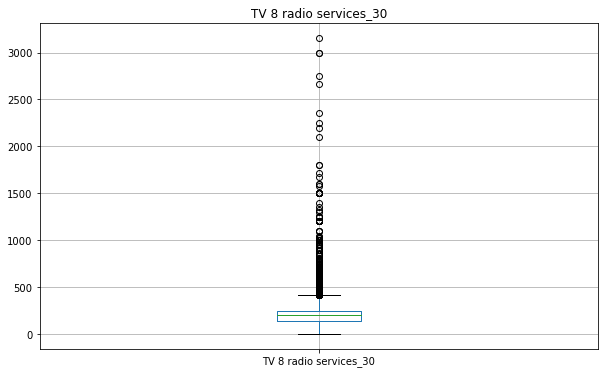

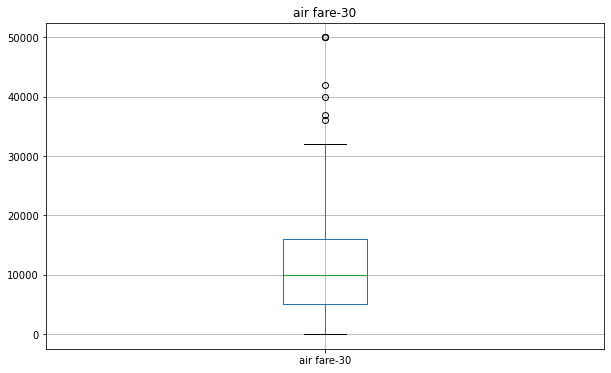

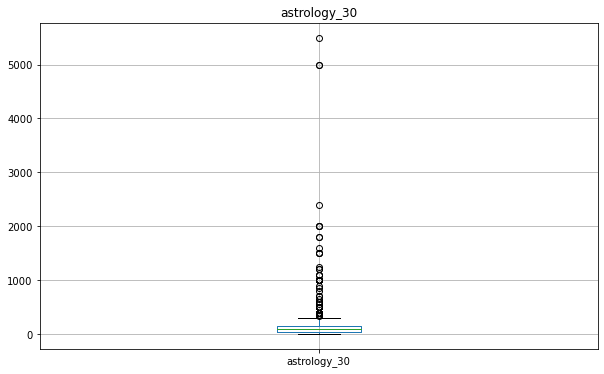

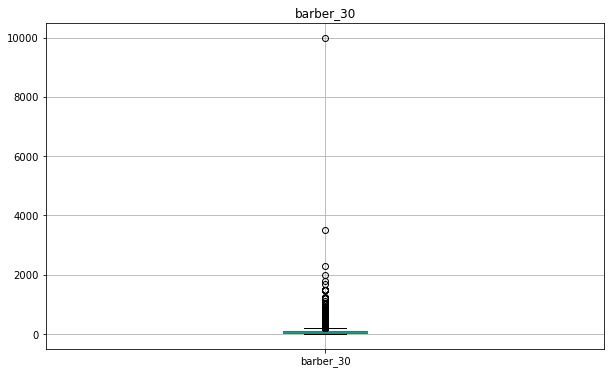

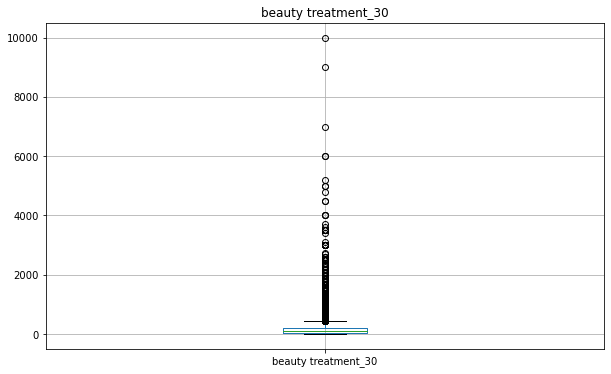

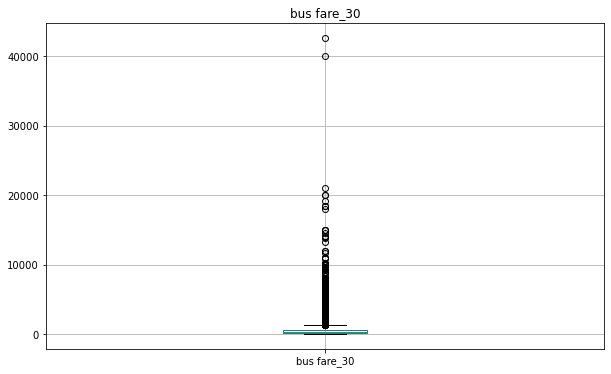

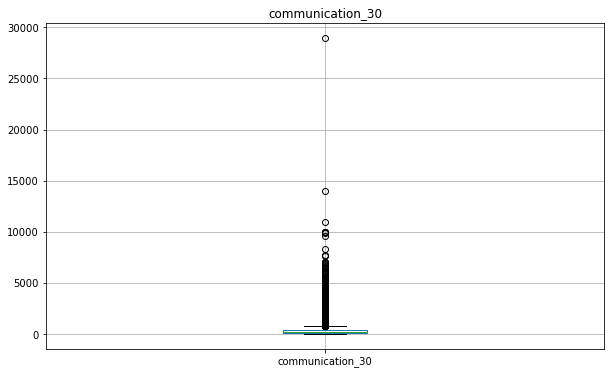

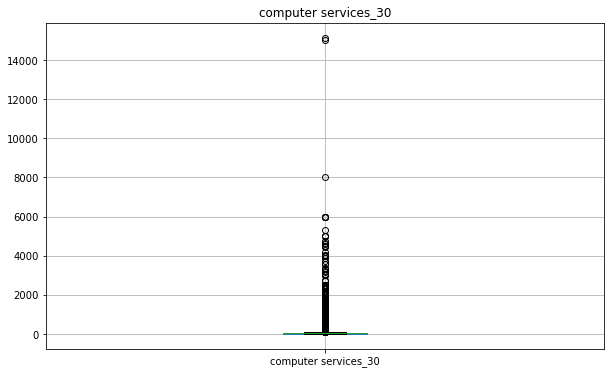

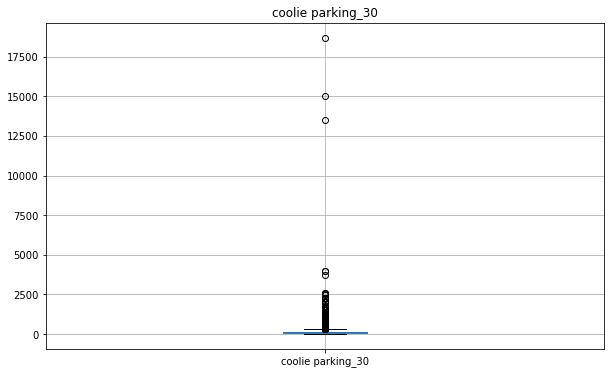

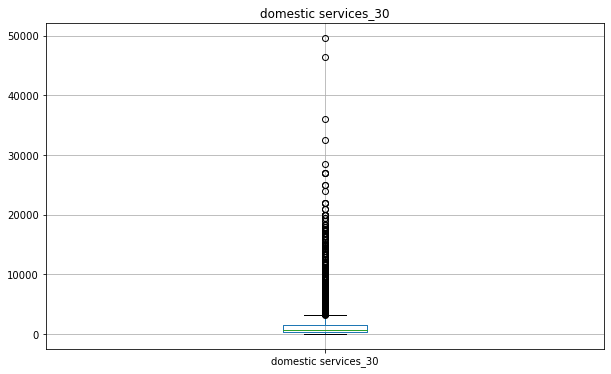

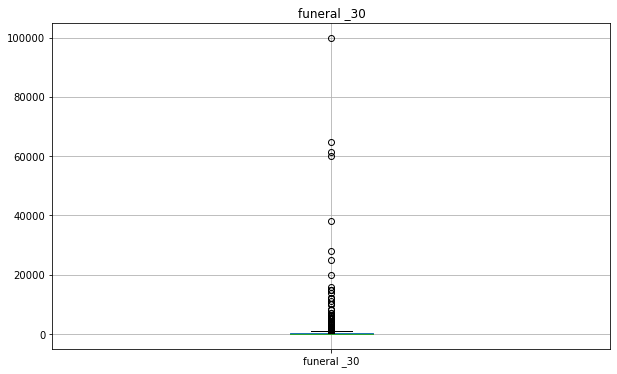

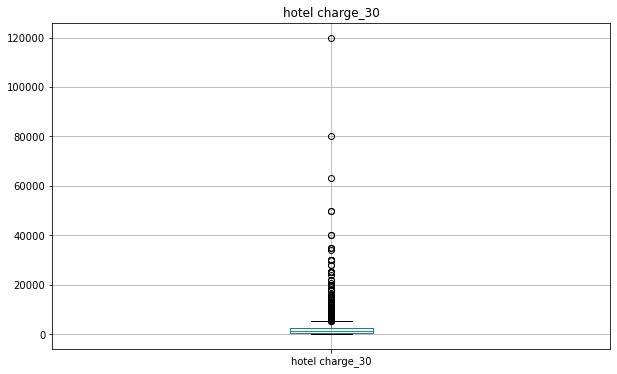

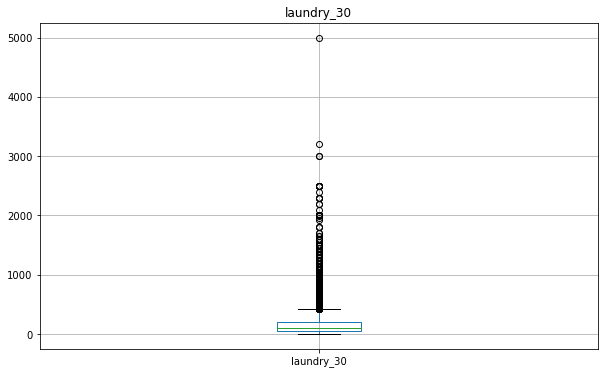

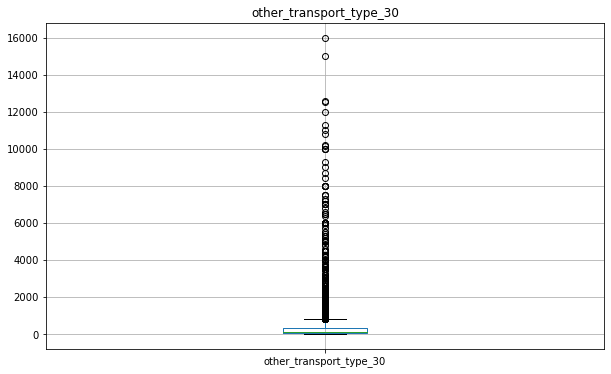

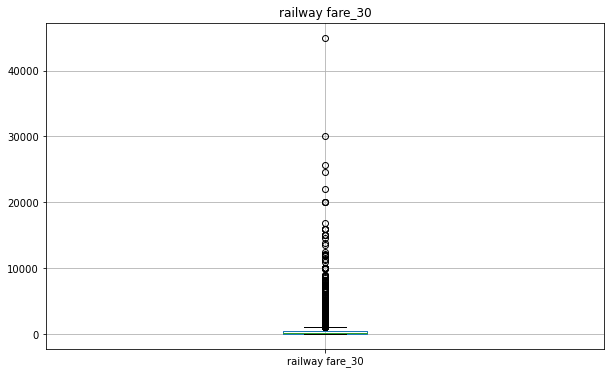

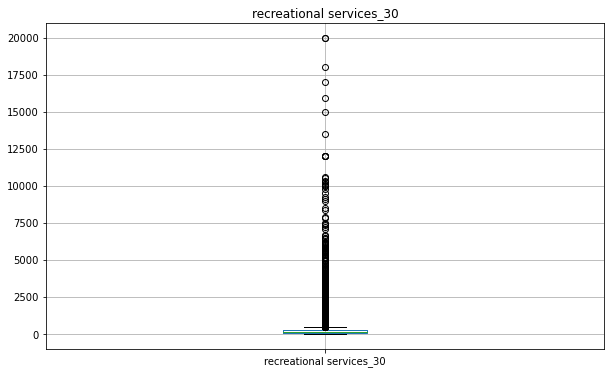

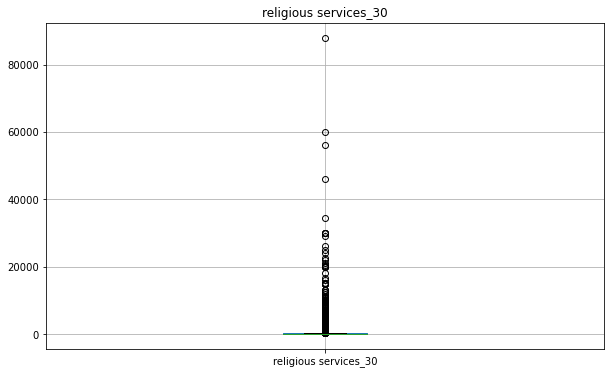

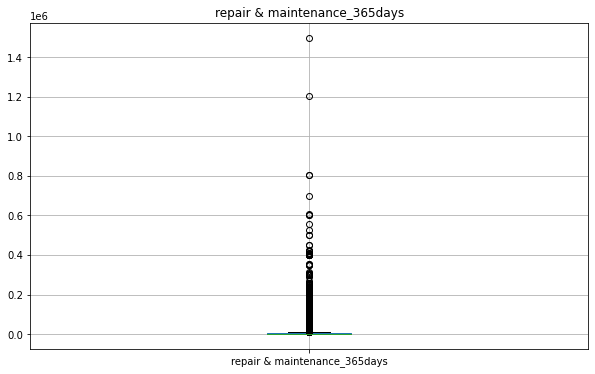

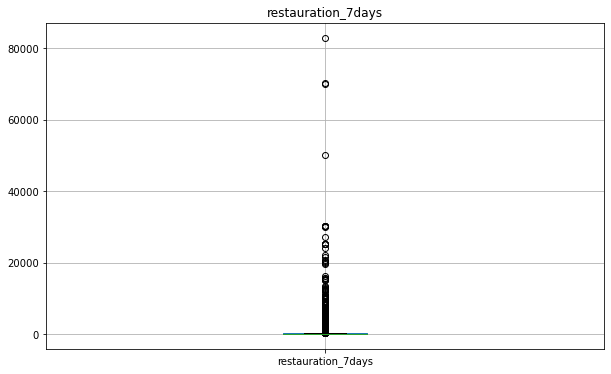

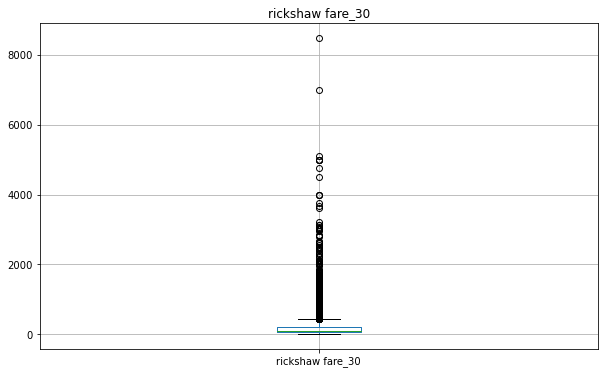

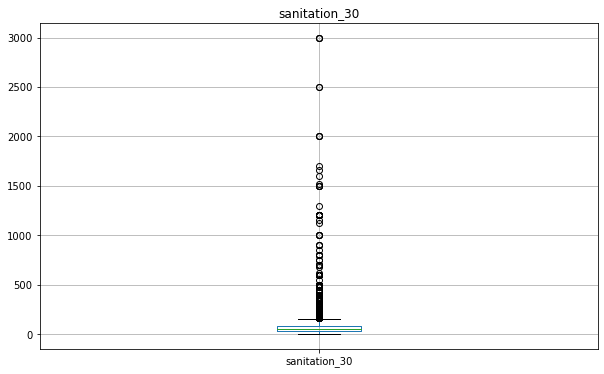

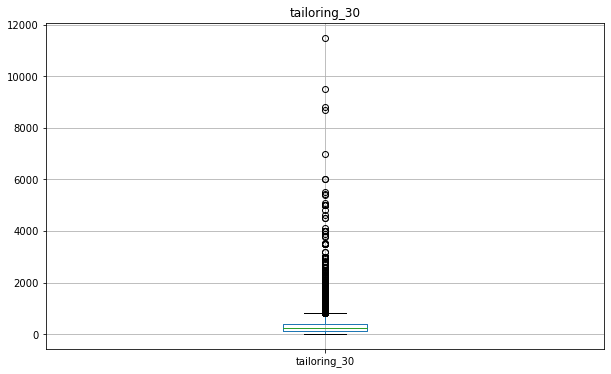

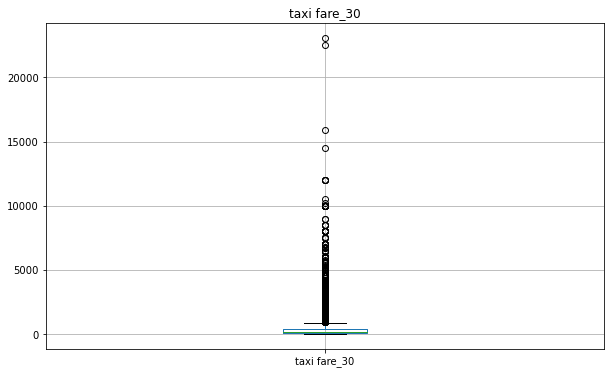

In [154]:
#we see there is outliers because the max is very far away from mean
#Check Outliers
num_df = table2.select_dtypes(exclude=['object'])
# Plot the variables (loop for plot variables) for num values
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    table2.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

In [176]:
table2[(table2['religious services_30'] > 40000)]

Item Code,Primary key - unique identifier for a household,TV 8 radio services_30,air fare-30,astrology_30,barber_30,beauty treatment_30,bus fare_30,communication_30,computer services_30,coolie parking_30,domestic services_30,funeral _30,hotel charge_30,laundry_30,other_transport_type_30,railway fare_30,recreational services_30,religious services_30,repair & maintenance_365days,restauration_7days,rickshaw fare_30,sanitation_30,tailoring_30,taxi fare_30
22491,743061201,230.0,NaN,NaN,140.0,NaN,1200.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46000.0,6040.0,60.0,NaN,NaN,230.0,NaN
48141,911371102,330.0,NaN,NaN,280.0,NaN,520.0,1200.0,250.0,NaN,12000.0,NaN,NaN,250.0,NaN,NaN,1330.0,88000.0,7750.0,770.0,NaN,NaN,NaN,NaN
62802,948961201,NaN,NaN,NaN,150.0,NaN,1100.0,400.0,50.0,NaN,400.0,5000.0,NaN,NaN,NaN,NaN,NaN,60000.0,1750.0,104.0,NaN,NaN,300.0,NaN
77653,987671101,340.0,NaN,NaN,100.0,NaN,600.0,925.0,198.0,NaN,6000.0,NaN,NaN,NaN,NaN,150.0,100.0,56000.0,25000.0,250.0,NaN,NaN,NaN,NaN


In [157]:
# For the pivot table we check the columns
table2.columns



Index(['TV 8 radio services_30', 'air fare-30', 'astrology_30', 'barber_30',
       'beauty treatment_30', 'bus fare_30', 'communication_30',
       'computer services_30', 'coolie parking_30', 'domestic services_30',
       'funeral _30', 'hotel charge_30', 'laundry_30',
       'other_transport_type_30', 'railway fare_30',
       'recreational services_30', 'religious services_30',
       'repair & maintenance_365days', 'restauration_7days',
       'rickshaw fare_30', 'sanitation_30', 'tailoring_30', 'taxi fare_30'],
      dtype='object', name='Item Code')

In [158]:
table2 = table2.reset_index()
table2.columns

Index(['Primary key - unique identifier for a household',
       'TV 8 radio services_30', 'air fare-30', 'astrology_30', 'barber_30',
       'beauty treatment_30', 'bus fare_30', 'communication_30',
       'computer services_30', 'coolie parking_30', 'domestic services_30',
       'funeral _30', 'hotel charge_30', 'laundry_30',
       'other_transport_type_30', 'railway fare_30',
       'recreational services_30', 'religious services_30',
       'repair & maintenance_365days', 'restauration_7days',
       'rickshaw fare_30', 'sanitation_30', 'tailoring_30', 'taxi fare_30'],
      dtype='object', name='Item Code')

In [159]:
table2

Item Code,Primary key - unique identifier for a household,TV 8 radio services_30,air fare-30,astrology_30,barber_30,beauty treatment_30,bus fare_30,communication_30,computer services_30,coolie parking_30,domestic services_30,funeral _30,hotel charge_30,laundry_30,other_transport_type_30,railway fare_30,recreational services_30,religious services_30,repair & maintenance_365days,restauration_7days,rickshaw fare_30,sanitation_30,tailoring_30,taxi fare_30
0,700001101,100.0,NaN,NaN,150.0,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN
1,700001301,100.0,NaN,50.0,100.0,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,100.0,7000.0,50.0,NaN,NaN,NaN,NaN
2,700001302,100.0,NaN,NaN,200.0,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,650.0,150.0,NaN,NaN,NaN,NaN
3,700002301,100.0,NaN,NaN,100.0,NaN,440.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,1625.0,185.0,NaN,NaN,150.0,NaN
4,700002302,100.0,NaN,NaN,100.0,NaN,50.0,200.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN,80.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83304,999951201,350.0,NaN,NaN,130.0,NaN,NaN,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,NaN,80000.0,NaN,NaN,NaN,NaN,900.0
83305,999951202,150.0,NaN,NaN,40.0,NaN,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.0,NaN,50.0,NaN,200.0
83306,999951203,280.0,NaN,NaN,60.0,NaN,NaN,400.0,NaN,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN,150.0,NaN,NaN,NaN,50.0,NaN,1500.0
83307,999951301,150.0,NaN,NaN,NaN,NaN,NaN,800.0,60.0,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,150.0,1000.0,9600.0,NaN,NaN,50.0,NaN,500.0


In [160]:
table2.loc[table2['Primary key - unique identifier for a household'] == 744471301 ]

Item Code,Primary key - unique identifier for a household,TV 8 radio services_30,air fare-30,astrology_30,barber_30,beauty treatment_30,bus fare_30,communication_30,computer services_30,coolie parking_30,domestic services_30,funeral _30,hotel charge_30,laundry_30,other_transport_type_30,railway fare_30,recreational services_30,religious services_30,repair & maintenance_365days,restauration_7days,rickshaw fare_30,sanitation_30,tailoring_30,taxi fare_30
23136,744471301,NaN,NaN,NaN,100.0,NaN,2300.0,180.0,NaN,NaN,NaN,NaN,950.0,NaN,NaN,NaN,NaN,NaN,12000.0,650.0,NaN,NaN,130.0,NaN


In [170]:
import pandas as pd # creat before the name of database on mysql (projectindia, then execute)
import mysql.connector 
import sqlalchemy

database_username = 'root'
database_password = '123rout&'
database_ip       = '127.0.0.1'
database_name     = 'projectINDIA'

database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                               format(database_username, database_password, 
                                                      database_ip, database_name), pool_recycle=1, pool_timeout=57600).connect()

data.to_sql(con=database_connection, name='expenditure', if_exists='append',chunksize=220)
database_connection.close() 

3. JOIN AVEC DATAFRAME

In [ ]:
#w import the dataframe to merge
datacaste= pd.read_csv(r'C:\Users\Lenovo\Documents\INDE DATA\INDIACASTERELIGION.csv')
#We make a copy of the file and work on it
datacaste = datacaste.copy()
datacaste.head()

In [ ]:
datacaste.columns

In [161]:
# MERGE, DROP UNNEEDED COLS, RE-ORDER COLUMNS
finaldf = pd.merge(datacaste, table2, on = 'Primary key - unique identifier for a household')

In [162]:
finaldf

,Primary key - unique identifier for a household,Sector,State-Region,State,State-District,Household size,Household type,Religion,Social group,Whether owns any non-agricultural enterprise,Whether acquired any major durable goods,Household usual monthly consumer expenditure(Rs.),TV 8 radio services_30,air fare-30,astrology_30,barber_30,beauty treatment_30,bus fare_30,communication_30,computer services_30,coolie parking_30,domestic services_30,funeral _30,hotel charge_30,laundry_30,other_transport_type_30,railway fare_30,recreational services_30,religious services_30,repair & maintenance_365days,restauration_7days,rickshaw fare_30,sanitation_30,tailoring_30,taxi fare_30
0,744471301,Rural,12,JAMMU & KASHMIR,Punch,6,Rural : non-agriculture,Islam,others,no,no,9000,NaN,NaN,NaN,100.0,NaN,2300.0,180.0,NaN,NaN,NaN,NaN,950.0,NaN,NaN,NaN,NaN,NaN,12000.0,650.0,NaN,NaN,130.0,NaN
1,744471302,Rural,12,JAMMU & KASHMIR,Punch,5,Rural : non-agriculture,Islam,others,no,no,10000,NaN,NaN,NaN,170.0,NaN,450.0,200.0,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,13000.0,300.0,NaN,NaN,NaN,NaN
2,744471303,Rural,12,JAMMU & KASHMIR,Punch,6,Rural : non-agriculture,others,Scheduled Castes,no,yes,100000,200.0,NaN,NaN,150.0,NaN,1700.0,200.0,30.0,NaN,NaN,NaN,500.0,NaN,NaN,NaN,50.0,NaN,8000.0,220.0,NaN,NaN,NaN,NaN
3,744472301,Rural,12,JAMMU & KASHMIR,Punch,8,Rural : Self employed in : agriculture,Islam,Scheduled Tribes,yes,no,4000,NaN,NaN,NaN,60.0,NaN,150.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN
4,744472302,Rural,12,JAMMU & KASHMIR,Punch,9,Rural : non-agriculture,Islam,Scheduled Tribes,no,no,7500,230.0,NaN,NaN,80.0,100.0,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,42000.0,NaN,NaN,NaN,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83304,924591102,Urban,351,A & N ISLANDS,South Andaman,5,Urban : Self - employed,Hinduism,others,yes,yes,25000,300.0,NaN,NaN,200.0,NaN,50.0,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,2000.0,150.0,300.0,NaN,NaN,NaN
83305,924591201,Urban,351,A & N ISLANDS,South Andaman,4,Urban : Self - employed,Christianity,others,yes,yes,10000,250.0,NaN,NaN,60.0,NaN,600.0,300.0,NaN,NaN,NaN,700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,100.0,NaN,NaN,NaN
83306,924591202,Urban,351,A & N ISLANDS,South Andaman,4,Urban : Self - employed,Hinduism,others,yes,yes,8000,220.0,NaN,NaN,40.0,NaN,50.0,240.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,NaN,NaN,488.0,720.0,NaN,NaN,NaN
83307,924591301,Urban,351,A & N ISLANDS,South Andaman,5,Urban : Self - employed,Christianity,others,yes,no,20000,300.0,NaN,NaN,200.0,60.0,100.0,1098.0,NaN,NaN,7000.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,5000.0,190.0,400.0,NaN,NaN,NaN


In [166]:
finaldf.loc[finaldf['Primary key - unique identifier for a household'] == 744471301 ]

,Primary key - unique identifier for a household,Sector,State-Region,State,State-District,Household size,Household type,Religion,Social group,Whether owns any non-agricultural enterprise,Whether acquired any major durable goods,Household usual monthly consumer expenditure(Rs.),TV 8 radio services_30,air fare-30,astrology_30,barber_30,beauty treatment_30,bus fare_30,communication_30,computer services_30,coolie parking_30,domestic services_30,funeral _30,hotel charge_30,laundry_30,other_transport_type_30,railway fare_30,recreational services_30,religious services_30,repair & maintenance_365days,restauration_7days,rickshaw fare_30,sanitation_30,tailoring_30,taxi fare_30
0,744471301,Rural,12,JAMMU & KASHMIR,Punch,6,Rural : non-agriculture,Islam,others,no,no,9000.0,NaN,NaN,NaN,100.0,NaN,2300.0,180.0,NaN,NaN,NaN,NaN,950.0,NaN,NaN,NaN,NaN,NaN,12000.0,650.0,NaN,NaN,130.0,NaN


In [163]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83309 entries, 0 to 83308
Data columns (total 35 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Primary key - unique identifier for a household    83309 non-null  int64  
 1   Sector                                             83309 non-null  object 
 2   State-Region                                       83309 non-null  int64  
 3   State                                              83309 non-null  object 
 4   State-District                                     83309 non-null  object 
 5   Household size                                     83309 non-null  int64  
 6   Household type                                     83309 non-null  object 
 7   Religion                                           83309 non-null  object 
 8   Social group                                       83309 non-null  object 
 9   Whethe

In [164]:
# convert just one columns

finaldf[["Household usual monthly consumer expenditure(Rs.)"]] = finaldf[["Household usual monthly consumer expenditure(Rs.)"]].apply(pd.to_numeric, errors='coerce')

In [165]:
finaldf.isna().sum()

Primary key - unique identifier for a household          0
Sector                                                   0
State-Region                                             0
State                                                    0
State-District                                           0
Household size                                           0
Household type                                           0
Religion                                                 0
Social group                                             0
Whether owns any non-agricultural enterprise             0
Whether acquired any major durable goods                 0
Household usual monthly consumer expenditure(Rs.)        5
TV 8 radio services_30                               27024
air fare-30                                          83178
astrology_30                                         82041
barber_30                                            11250
beauty treatment_30                                  624

In [167]:
finaldf.corr()

,Primary key - unique identifier for a household,State-Region,Household size,Household usual monthly consumer expenditure(Rs.),TV 8 radio services_30,air fare-30,astrology_30,barber_30,beauty treatment_30,bus fare_30,communication_30,computer services_30,coolie parking_30,domestic services_30,funeral _30,hotel charge_30,laundry_30,other_transport_type_30,railway fare_30,recreational services_30,religious services_30,repair & maintenance_365days,restauration_7days,rickshaw fare_30,sanitation_30,tailoring_30,taxi fare_30
Primary key - unique identifier for a household,1.000000,-0.116907,-0.049778,0.175493,0.221936,0.130253,0.111555,0.117633,0.182246,0.127317,0.240505,0.105010,0.027300,-0.036997,0.021468,0.129871,0.167711,0.038802,0.119831,0.094188,0.054573,0.026108,0.084576,0.108064,0.018746,0.105894,0.068025
State-Region,-0.116907,1.000000,-0.144066,-0.019688,-0.243111,0.175595,0.049424,0.130951,-0.008434,-0.014063,0.018685,0.010087,-0.018870,0.133435,0.095736,0.009676,0.078345,0.104027,0.013801,-0.001493,-0.000498,-0.022205,0.020797,0.103202,0.030624,0.000762,0.082324
Household size,-0.049778,-0.144066,1.000000,0.200755,0.097832,-0.055506,-0.035349,0.244188,0.069061,0.121490,0.124897,-0.012103,0.001940,0.055715,-0.011149,-0.038982,0.043733,0.037050,0.008452,0.026141,0.046884,0.043670,0.017840,0.039771,0.014293,0.145933,0.020106
Household usual monthly consumer expenditure(Rs.),0.175493,-0.019688,0.200755,1.000000,0.220936,0.191386,0.216104,0.236873,0.293597,0.210162,0.350828,0.114081,0.078651,0.247425,0.050674,0.252359,0.282025,0.180150,0.238359,0.189924,0.117826,0.108469,0.128753,0.157577,0.071450,0.197502,0.148585
TV 8 radio services_30,0.221936,-0.243111,0.097832,0.220936,1.000000,0.129454,0.099883,0.165174,0.318990,0.199196,0.374653,0.146019,0.093352,0.243764,0.012101,0.265714,0.287564,0.183085,0.186596,0.213229,0.108259,0.093556,0.149152,0.164697,0.091244,0.202802,0.112715
air fare-30,0.130253,0.175595,-0.055506,0.191386,0.129454,1.000000,-1.000000,0.198660,0.211413,0.217359,0.287335,0.121698,0.200218,0.027095,-0.010723,0.129058,0.183828,0.535218,0.319813,0.265134,0.499446,0.001730,0.232456,0.071363,0.050439,0.074561,0.557349
astrology_30,0.111555,0.049424,-0.035349,0.216104,0.099883,-1.000000,1.000000,0.242019,0.346323,0.193333,0.330633,0.388330,0.037122,0.008634,0.467883,0.152415,0.158063,0.074515,0.529020,0.122554,0.152112,0.075051,0.220014,0.322842,0.088682,0.262431,0.253175
barber_30,0.117633,0.130951,0.244188,0.236873,0.165174,0.198660,0.242019,1.000000,0.374232,0.272160,0.386264,0.142810,0.110156,0.257759,0.093167,0.128863,0.306562,0.230059,0.187429,0.176220,0.084963,0.097631,0.132331,0.181844,0.075469,0.265026,0.208634
beauty treatment_30,0.182246,-0.008434,0.069061,0.293597,0.318990,0.211413,0.346323,0.374232,1.000000,0.219740,0.469248,0.193282,0.229047,0.357461,0.011621,0.334488,0.443362,0.271310,0.153941,0.335011,0.240305,0.138737,0.195041,0.253285,0.058966,0.304835,0.255494
bus fare_30,0.127317,-0.014063,0.121490,0.210162,0.199196,0.217359,0.193333,0.272160,0.219740,1.000000,0.342411,0.171071,0.088262,0.192211,0.031226,0.119422,0.280523,0.177155,0.279565,0.202132,0.083776,0.080382,0.138325,0.227764,0.102021,0.196955,0.200000


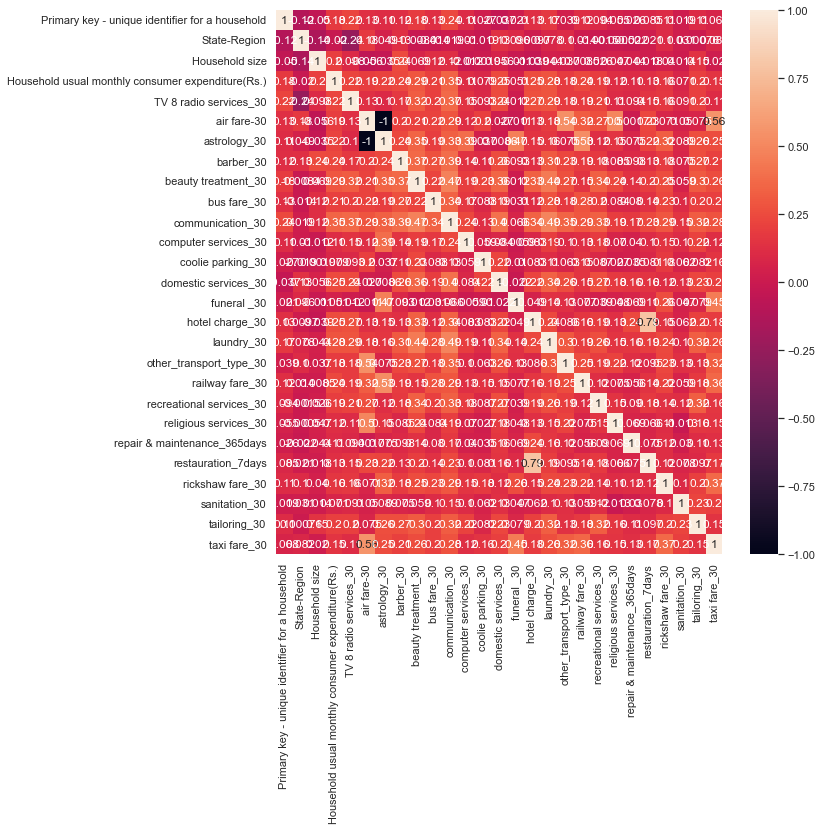

In [168]:
#check collinarity
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize=(10,10))  
ax =sns.heatmap(finaldf.corr(), annot=True)

In [169]:
##Exporting File before encoding
file_url2 = r'C:\Users\Lenovo\Documents\INDE DATA\finaldfcaste_expendititude.csv'
finaldf.to_csv(file_url2,index = False)
